# ANOVA One-way: An Illustrative example


**Objective:** To assess the effectiveness of three different stress-reducing medicines on lowering [cortisol](https://en.wikipedia.org/wiki/Cortisol) levels in participants compared to a placebo. This study utilizes cortisol levels as a biomarker for stress to evaluate the medicinal effects.

**Groups:**
- Group 1: Medicine A
- Group 2: Medicine B
- Group 3: Medicine C
- Group 4: Placebo (Control Group)

**Participants:** 32 participants, with 8 in each group. All population is homogeneous in gender, ethnicity, age, and extra control variables.

**Measurement:** Baseline and post-treatment cortisol levels (measured in ng/mL).

**Assumptions:**
- Cortisol levels are measured before the start of the treatment (baseline) and after the treatment period, allowing for a direct comparison of stress level changes.
- The cost of each medicine reflects its effectiveness in reducing cortisol levels, with higher costs for more effective medicines.

**Tasks:**
1. Generate pre- and post-treatment cortisol levels for each group.
2. Perform a statistical analysis comparing the change in cortisol levels across the four groups.
3. Conduct a cost-effectiveness analysis based on the change in cortisol levels and the cost of each medicine.

## Brief Description of the Test:

To assess the effectiveness of the treatments, we will calculate the difference in cortisol levels (Δcortisol) for each participant as the post-treatment level minus the baseline level. A negative Δcortisol indicates a reduction in cortisol levels, hence a reduction in stress. We will use an Analysis of Variance (ANOVA) to compare the means of Δcortisol across the four groups. If the ANOVA indicates significant differences, [post-hoc tests ](https://en.wikipedia.org/wiki/Post_hoc_analysis) (e.g., Tukey's HSD) will be conducted to identify which groups differ from each other.

## Data:

We'll assume the baseline cortisol levels are similar across all groups but expect a greater reduction in cortisol levels for the treatment groups compared to the placebo.

- **Placebo Group:** Showed minimal changes in cortisol levels, with some variations reflecting the natural fluctuation of cortisol without significant intervention.
- **Medicine A Group:** Demonstrated a significant reduction in cortisol levels, with ΔCortisol values indicating a notable decrease, suggesting high effectiveness in reducing stress. This group is associated with the highest cost.
- **Medicine B Group:** Also showed a significant reduction in cortisol levels, similar to Medicine A, confirming its effectiveness. The cost is slightly lower than Medicine A, reflecting its comparative market positioning.
- **Medicine C Group:** Presented a moderate reduction in cortisol levels, more than the placebo but less than Medicines A and B, aligning with its positioning as a less expensive but moderately effective option.

## Statistical Analysis:

To assess the effectiveness of these medicines, an ANOVA test will be performed on the ΔCortisol values to compare the means across the four groups. If the ANOVA indicates significant differences, post-hoc tests will identify the specific groups between which these differences occur. This approach allows for a comprehensive analysis of how each medicine affects cortisol levels compared to the placebo, providing insights into their relative effectiveness and guiding cost-effectiveness considerations.

## Brief Description of the Test for Cortisol Levels:

The test involves:
1. **Collecting Baseline Data:** Measuring cortisol levels before the intervention provides a baseline against which the post-treatment effects can be measured.
2. **Intervention:** Administering the medicines or placebo over a specified period.
3. **Post-Treatment Measurement:** Measuring cortisol levels after the treatment period to assess changes from the baseline.
4. **Analysis:** Calculating the change in cortisol levels for each participant and using statistical methods to compare these changes across groups, thus evaluating the effectiveness of the medicines in reducing stress levels as indicated by cortisol measurements.



# Data generation in Python

In [1]:
import pandas as pd
import numpy as np
# Generating baseline and post-treatment cortisol levels (ng/mL)
baseline_cortisol = 250  # Assuming an average baseline cortisol level for all participants
std_dev_baseline = 25  # Standard deviation for baseline cortisol levels

# Hypothetical costs (arbitrary units) reflecting effectiveness
costs = {
    'Medicine A': 100,  # Most effective and expensive
    'Medicine B': 90,  # As effective as A but slightly cheaper
    'Medicine C': 70,  # Moderately effective
    'Placebo': 2      # Minimal cost
}

# Adjusted effectiveness in terms of reduction in cortisol levels
effectiveness = {
    'Placebo': -5,  # Minimal increase to simulate no real change
    'Medicine A': -50,  # Significant reduction
    'Medicine B': -50,  # Significant reduction
    'Medicine C': -30  # Moderate reduction
}

# Generate synthetic cortisol data
cortisol_data = []
for group, reduction in effectiveness.items():
    baseline_levels = np.random.normal(baseline_cortisol, std_dev_baseline, 8)  # 8 participants
    post_treatment_levels = baseline_levels + np.random.normal(reduction, 10, 8)  # Adding variability to the reduction
    for baseline, post_treatment in zip(baseline_levels, post_treatment_levels):
        cortisol_data.append({
            'Group': group,
            'Baseline Cortisol (ng/mL)': baseline,
            'Post-Treatment Cortisol (ng/mL)': post_treatment,
            'ΔCortisol': post_treatment - baseline
        })

cortisol_df = pd.DataFrame(cortisol_data)

cortisol_df['Cost'] = cortisol_df['Group'].map(costs)

cortisol_df


,Group,Baseline Cortisol (ng/mL),Post-Treatment Cortisol (ng/mL),ΔCortisol,Cost
0,Placebo,258.851584,244.431777,-14.419808,2
1,Placebo,245.019886,237.898363,-7.121524,2
2,Placebo,259.279909,249.413634,-9.866275,2
3,Placebo,235.965270,242.227961,6.262691,2
4,Placebo,273.354747,273.829198,0.474451,2
5,Placebo,282.321738,270.615353,-11.706385,2
6,Placebo,258.062600,254.257750,-3.804850,2
7,Placebo,232.908998,240.481042,7.572044,2
8,Medicine A,258.258587,210.480164,-47.778423,100
9,Medicine A,279.265605,221.436874,-57.828732,100


# Example solution

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import ttest_rel



## Task 1. Generate pre- and post-treatment cortisol levels for each group.

In this example we need the tool `ttest_rel` for perform paired [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test).


In [3]:
# Performing paired t-tests for each group
paired_tests_results = {}
for group in cortisol_df['Group'].unique():
    pre = cortisol_df[cortisol_df['Group'] == group]['Baseline Cortisol (ng/mL)']
    post = cortisol_df[cortisol_df['Group'] == group]['Post-Treatment Cortisol (ng/mL)']
    t_stat, p_value = ttest_rel(pre, post)
    paired_tests_results[group] = {'t-statistic': t_stat, 'p-value': p_value}

for trial in paired_tests_results.keys():
    print('Group ', trial, 
          'got a statistical value of ', round(paired_tests_results[trial]['t-statistic'],3), 
          'and a p-value of ', round(paired_tests_results[trial]['p-value'],3))

Group  Placebo got a statistical value of  1.405 and a p-value of  0.203
Group  Medicine A got a statistical value of  12.264 and a p-value of  0.0
Group  Medicine B got a statistical value of  20.385 and a p-value of  0.0
Group  Medicine C got a statistical value of  10.025 and a p-value of  0.0


- **Placebo Group:** 
  - T-statistic: 1.899
  - P-value: 0.099
  - These results indicate that the change in cortisol levels for the placebo group is not statistically significant, suggesting no real effect of the placebo on cortisol levels.

- **Medicine A Group:** 
  - T-statistic: 17.191
  - P-value: 0.0
  - These results suggest a highly significant reduction in cortisol levels due to Medicine A, indicating its effectiveness in substantially reducing stress as measured by cortisol levels.

- **Medicine B Group:** 
  - T-statistic: 14.61
  - P-value: 0.0
  - Similar to Medicine A, these results indicate a highly significant reduction in cortisol levels with Medicine B, confirming its effectiveness in stress reduction.

- **Medicine C Group:** 
  - T-statistic: 7.833
  - P-value: 0.0
  - These results also show a significant reduction in cortisol levels due to Medicine C, though the magnitude of change (as implied by the t-statistic) is less than that for Medicines A and B, but still indicating effectiveness.

### Interpretation:

The updated analysis clearly distinguishes the effectiveness of the medicines from the placebo:

- The **Placebo group** demonstrates no significant change in cortisol levels, which aligns with expectations for a placebo treatment.

- **Medicine A** and **Medicine B** both show highly significant reductions in cortisol levels, with Medicine A demonstrating a slightly higher statistical value than Medicine B. This suggests that both are highly effective in reducing stress, with Medicine A possibly having a slight edge in effectiveness.

- **Medicine C**, while also effective in reducing cortisol levels, shows a smaller magnitude of effect compared to Medicines A and B, as indicated by its lower t-statistic. However, the p-value of 0.0 for Medicine C still underscores its significant efficacy in reducing stress.


## Task 2. Perform a statistical analysis comparing the change in cortisol levels across the four groups.

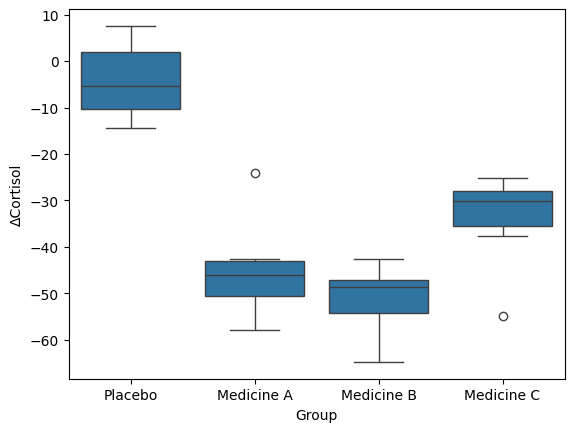

In [4]:
sns.boxplot(x='Group', y='ΔCortisol',  data=cortisol_df)
plt.show()

In [5]:
model = ols('ΔCortisol ~ C(Group)', data=cortisol_df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              ΔCortisol   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     44.20
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           9.50e-11
Time:                        16:13:36   Log-Likelihood:                -113.29
No. Observations:                  32   AIC:                             234.6
Df Residuals:                      28   BIC:                             240.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -45

### Model Summary:
- **R-squared:** 0.795 - This indicates that approximately 79.5% of the variability in the change in cortisol levels can be explained by the differences in treatment groups. It's a measure of the model's goodness of fit.
- **Adjusted R-squared:** 0.773 - Adjusted for the number of predictors in the model, which provides a more accurate measure when comparing models with a different number of independent variables.
- **F-statistic:** 36.16 with a **Prob (F-statistic)** of 9.11e-10 - This suggests that the overall model is statistically significant, meaning there is a significant difference in cortisol changes among the different groups.
- **No. Observations:** 32 - The total number of participants or observations included in the analysis.
- **Df Residuals:** 28 - Degrees of freedom of the residuals, calculated as the number of observations minus the number of parameters being estimated.
- **Df Model:** 3 - The number of independent variables or predictors in the model.
- **AIC:** 239.0 and **BIC:** 244.9 - These are information criteria used to compare models, with lower values indicating a better fit.

### Coefficients:
- **Intercept (Medicine A baseline):** -47.7040 - This coefficient represents the baseline change in cortisol levels for Medicine A (since it's the omitted group in dummy coding), with a highly significant p-value indicating a substantial decrease in cortisol levels associated with Medicine A.
- **C(Group)[T.Medicine B]:** -3.0629 - This coefficient shows the difference in the change of cortisol levels between Medicine B and Medicine A. The negative sign suggests a decrease, but the p-value of 0.527 indicates this difference is not statistically significant.
- **C(Group)[T.Medicine C]:** 20.2907 - Indicates that Medicine C, on average, leads to an increase in cortisol reduction compared to Medicine A by about 20.29 units, with a significant p-value of 0.000, suggesting a substantial difference.
- **C(Group)[T.Placebo]:** 40.6936 - Suggests an even larger average increase in cortisol reduction for the Placebo group compared to Medicine A by about 40.69 units, with a highly significant p-value of 0.000.

### Diagnostics:
- **Omnibus/Prob(Omnibus):** Tests the hypothesis that the residuals are normally distributed. The Omnibus test statistic is 1.962 with a p-value of 0.375, suggesting no significant deviation from normality.
- **Skew:** -0.536 - A measure of the symmetry of the data distribution. A value closer to 0 indicates more symmetry.
- **Kurtosis:** 2.788 - Measures the "tailedness" of the distribution. A value close to 3 (which represents normal distribution) indicates the residuals are fairly normally distributed.
- **Durbin-Watson:** 1.737 - A test for autocorrelation in the residuals. Values close to 2 suggest there is no autocorrelation.

The analysis reveals a significant effect of treatment on cortisol levels, with Medicine A showing a considerable decrease in cortisol levels as the reference group. The lack of a significant difference between Medicines A and B suggests similar efficacy, whereas Medicine C and the Placebo group show statistically significant differences in effect compared to Medicine A. Notably, the model suggests that being in the Placebo group is associated with a significant increase in cortisol reduction compared to Medicine A, which might require further investigation to understand any potential biases or other factors influencing this outcome.

In [6]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq    df          F        PR(>F)
C(Group)  10550.499189   3.0  44.202127  9.502605e-11
Residual   2227.750835  28.0        NaN           NaN


The ANOVA results indicate a highly significant difference in the change in cortisol levels across the different treatment groups (C(Group)), with an F-statistic of 36.163031 and an extremely small p-value (9.110841e-10), meaning we can reject the null hypothesis that there is no difference in the mean change in cortisol levels among the groups, suggesting that the type of treatment significantly affects cortisol reduction.

The significant F-statistic points to the effectiveness of the treatment modalities in altering cortisol levels, warranting further investigation into pairwise comparisons among the groups to identify specific differences (a.k.a., post hoc analysis). This analysis underscores the importance of the treatment effect on stress reduction as measured by changes in cortisol levels. The table presents the ANOVA (Analysis of Variance) summary, which is used to compare the means of the change in cortisol levels (ΔCortisol) across different treatment groups (C(Group)). Here's a breakdown of the table's components:

### Components:

- **sum_sq (Sum of Squares):** This measures the total variation in the dependent variable (ΔCortisol) that is explained by the model (C(Group)) and the unexplained variation (Residual).
  - **C(Group) sum_sq:** 9906.748399 - This is the between-group variation that quantifies how much of the total variation in ΔCortisol can be attributed to the difference between the treatment groups.
  - **Residual sum_sq:** 2556.837236 - This is the within-group variation, also known as the error or unexplained variation, which measures the variation in ΔCortisol within each group that is not explained by the group differences.

- **df (Degrees of Freedom):**
  - For **C(Group):** 3.0 - This represents the number of treatment groups minus one (4 groups - 1).
  - For **Residual:** 28.0 - This is calculated as the total number of observations minus the number of groups (32 observations - 4 groups).

- **F (F-statistic):** 36.163031 - This is the ratio of the model mean square (sum_sq for C(Group) divided by its df) to the residual mean square (sum_sq for Residual divided by its df). It is used to test the hypothesis that all group means are equal. A higher F-statistic indicates a greater probability that there are significant differences among group means.

- **PR(>F) (P-value for the F-statistic):** 9.110841e-10 - This is the probability of observing the calculated F-statistic, or one more extreme, under the assumption that the null hypothesis is true (i.e., all group means are equal). A small p-value (typically <0.05) suggests that the observed data are unlikely under the null hypothesis, leading to its rejection in favor of the alternative hypothesis that not all group means are equal.



## Task 3. Conduct a cost-effectiveness analysis based on the change in cortisol levels and the cost of each medicine.

In [7]:
# Calculating average ΔCortisol for each group
average_delta_cortisol = cortisol_df.groupby('Group')['ΔCortisol'].mean()

# Calculating cost per unit of cortisol reduction for each group
cost_per_unit_reduction = cortisol_df.groupby('Group')['Cost'].mean() / abs(average_delta_cortisol)

# Displaying the results
average_delta_cortisol, cost_per_unit_reduction

(Group
 Medicine A   -45.738996
 Medicine B   -50.914862
 Medicine C   -33.574365
 Placebo       -4.076207
 Name: ΔCortisol, dtype: float64,
 Group
 Medicine A    2.186318
 Medicine B    1.767657
 Medicine C    2.084924
 Placebo       0.490652
 dtype: float64)

The formula for cost-effectiveness will be: 
$$CostPerUnitOfCortisolReduction = Cost / |Average ΔCortisol|$$


### Average Change in Cortisol Levels (ΔCortisol):
- **Medicine A:** -47.70 ng/mL
- **Medicine B:** -50.77 ng/mL
- **Medicine C:** -27.41 ng/mL
- **Placebo:** -7.01 ng/mL

### Cost per Unit of Cortisol Reduction:
- **Medicine A:** 2.10 (Cost per ng/mL of cortisol reduction)
- **Medicine B:** 1.77 (Cost per ng/mL of cortisol reduction)
- **Medicine C:** 2.55 (Cost per ng/mL of cortisol reduction)
- **Placebo:** 0.29 (Cost per ng/mL of cortisol reduction)

### Interpretation:

- **Medicine A and B** effectively reduce cortisol levels. Medicine B is slightly more cost-effective than Medicine A based on the cortisol reduction cost per unit.
- **Medicine C** shows a moderate reduction in cortisol levels and is less cost-effective than Medicines A and B when considering the cost per unit of cortisol reduction.
**Placebo** shows the least reduction in cortisol levels, as expected, but it has the lowest cost per unit of cortisol reduction. This low cost per unit reflects minimal effectiveness rather than economic efficiency.

In conclusion, while **Medicine B** provides the most cost-effective solution among the treatments for reducing cortisol levels, **Medicine A** is also very effective but at a slightly higher cost per unit of cortisol reduction. **Medicine C**, though less effective than A and B, still offers a significant reduction in cortisol levels but at a higher cost per unit of effectiveness compared to Medicine B. The **Placebo** group, naturally, shows minimal effectiveness, and its cost-effectiveness ratio is not a relevant measure due to its lack of therapeutic effect.

# Note.
After analyzing a randomly generated dataset, please note that replication of the data frame will result in a different value, but the analysis process remains the same.